In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
root_path = 'C:/Users/vidhu/Road Signs classification dataset /'
data_dir_train = pathlib.Path(root_path+'DATA/')
data_dir_test = pathlib.Path(root_path+'TEST/')

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg'))) + len(list(data_dir_train.glob('*/*.png')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))+ len(list(data_dir_test.glob('*/*.png')))
print(image_count_test)

743
280


In [4]:
for path in data_dir_train.glob('*/*.PNG'):
    print(path)


C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0033.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0034.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0035.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0036.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0037.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0038.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0039.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0040.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0041.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0042.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0043.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0044.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0045.png
C:\Users\vidhu\Road Signs classification dataset\DATA\0\000_0046.png
C:\Users\vidhu\Road Signs classifi

In [9]:
batch_size = 32
img_height = 180
img_width = 180
num_classes =30

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.3,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 743 files belonging to 30 classes.
Using 521 files for training.


In [11]:
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.3,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 743 files belonging to 30 classes.
Using 222 files for validation.


In [12]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 280 files belonging to 30 classes.


In [13]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']


In [14]:
import pandas as pd
df = pd.read_csv("labels.csv") 

In [15]:
df['ClassId'] = df['ClassId'].astype(str)
class_names_raw = train_ds.class_names
label_map = dict(zip(df['ClassId'], df['Name']))
class_labels = [label_map[c] for c in class_names_raw]

In [16]:
class_labels

['Speed limit (5km/h)',
 'Speed limit (15km/h)',
 'Dont Go straight',
 'Dont Go Left',
 'Dont Go Left or Right',
 'Dont Go Right',
 'Dont overtake from Left',
 'No Uturn',
 'No Car',
 'No horn',
 'No entry',
 'No stopping',
 'Speed limit (30km/h)',
 'Go straight or right',
 'Go straight',
 'Go Left',
 'Go Left or right',
 'Go Right',
 'keep Left',
 'keep Right',
 'Roundabout mandatory',
 'watch out for cars',
 'Horn',
 'Speed limit (40km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'speed limit (80km/h)',
 'Dont Go straight or left',
 'Unknown7']

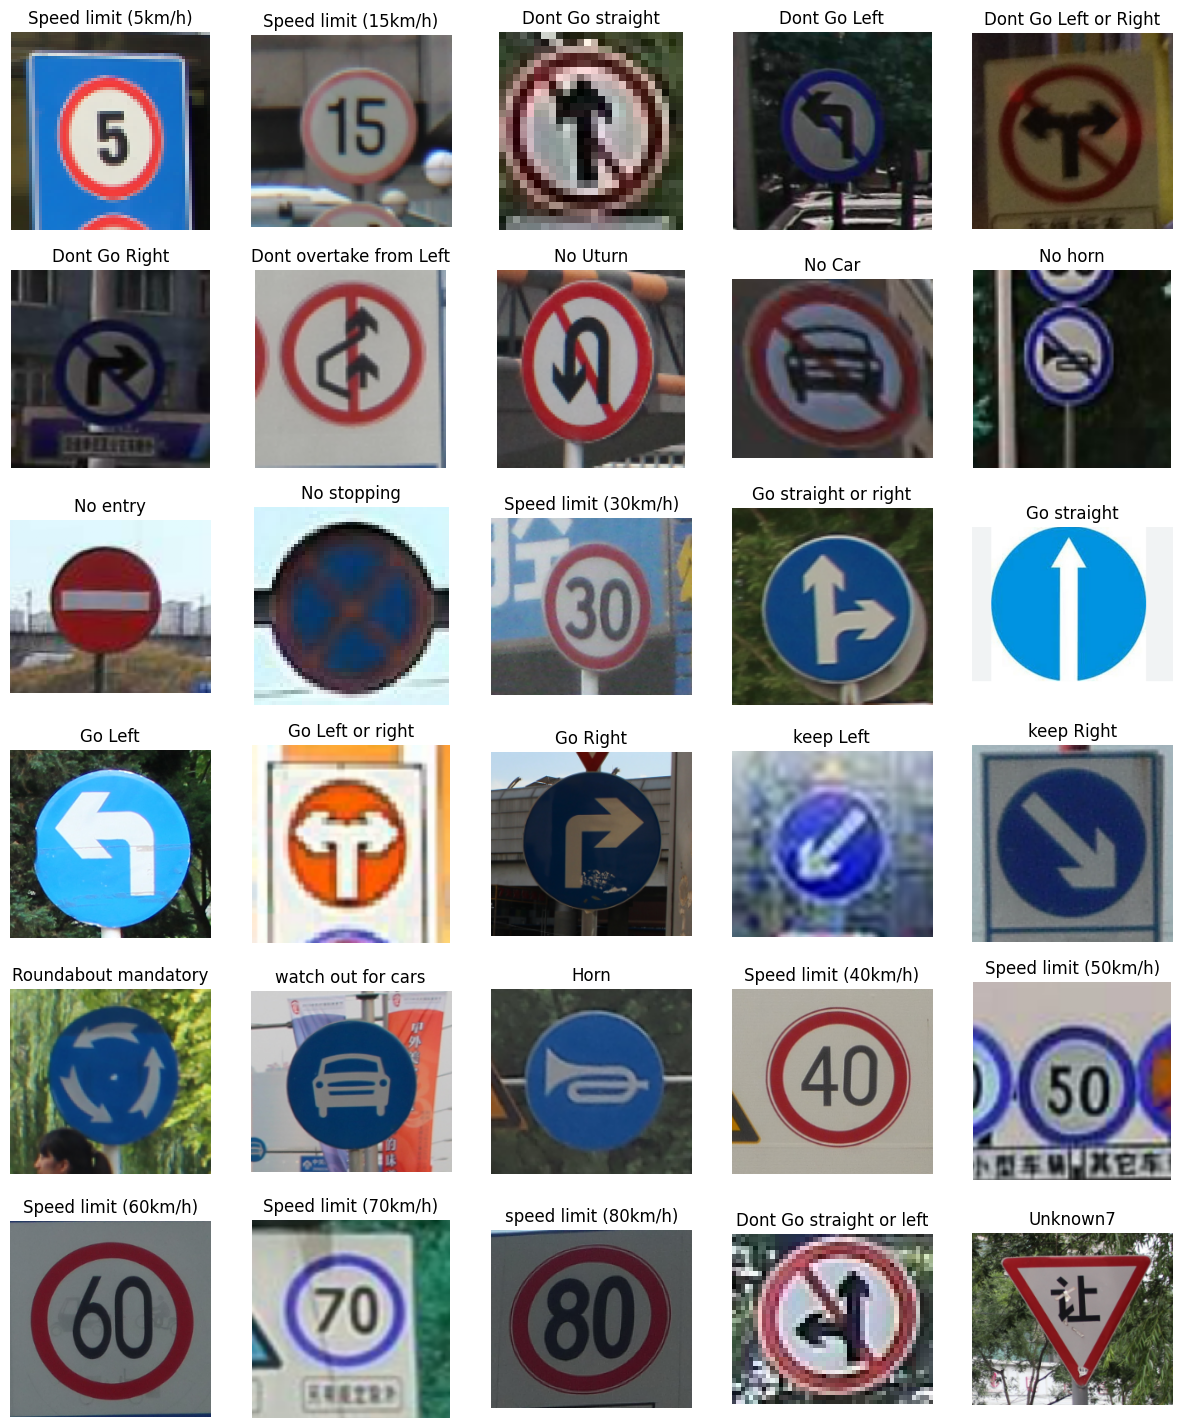

In [17]:
plt.figure(figsize=(15, 18))
for i in range(30): 
    plt.subplot(6, 5, i + 1)
    image_path = list(data_dir_train.glob(f'{class_names_raw[i]}/*.png'))[0]
    image = mpimg.imread(str(image_path))
    plt.title(class_labels[i])
    plt.imshow(image)
    plt.axis("off")
plt.show()

AUTOTUNE

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

MODEL-1

In [19]:
from tensorflow.keras.models import Sequential
model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])
# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 2nd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 3rd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 4th convolution layer 
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))
# Fully connected layer 2
model.add(Dense(128, activation='relu'))
# Output layer
model.add(Dense(num_classes, activation = "softmax"))

MODEL COMPLIE 

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,072,254 (4.09 MB)

 Trainable params: 1,072,254 (4.09 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.0279 - loss: 3.4096 - val_accuracy: 0.0090 - val_loss: 3.4011
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.0664 - loss: 3.3556 - val_accuracy: 0.0856 - val_loss: 3.2865
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.1463 - loss: 3.0754 - val_accuracy: 0.1982 - val_loss: 2.9083
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.3286 - loss: 2.3946 - val_accuracy: 0.4009 - val_loss: 2.5374
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5546 - loss: 1.7740 - val_accuracy: 0.5090 - val_loss: 2.0444
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.6577 - loss: 1.2143 - val_accuracy: 0.5541 - val_loss: 1.8202
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.7353 - loss: 0.8104 - val_accuracy: 0.6802 - val_loss: 1.6498
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.8219 - loss: 0.5874 - val_accuracy: 0.

RESULTS

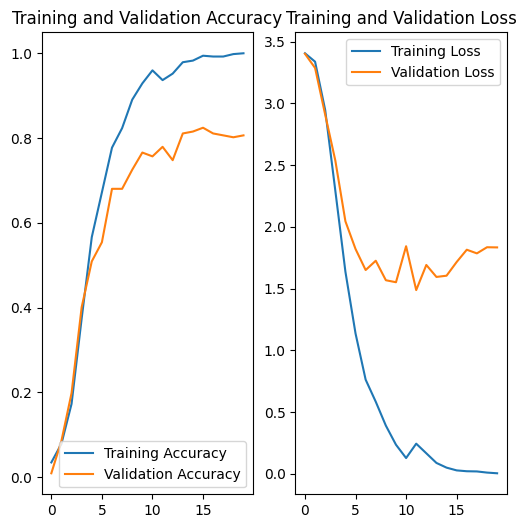

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4022 - loss: 6.8710
Test Accuracy: 0.39
Test Loss: 6.73


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

print(classification_report(y_true, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.33      0.44         6
           2       0.92      1.00      0.96        12
           3       0.42      0.50      0.46        22
           4       0.00      0.00      0.00         9
           5       0.28      0.82      0.42        11
           6       0.50      0.50      0.50         2
           7       0.62      0.53      0.57        15
           8       0.28      0.45      0.34        11
           9       1.00      0.14      0.25        14
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.59      1.00      0.74        10
          13       0.50      1.00      0.67         2
          14       0.33      0.12      0.18         8
          15       0.29      0.40      0.33         5
          16       0.60      0.43      0.50

In [29]:
from tensorflow.keras.preprocessing import image

def predict_new_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    print('Predicted Class:', class_labels[predicted_class])
    print('Confidence:', confidence)

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Class: Go straight or right
Confidence: 0.21506688


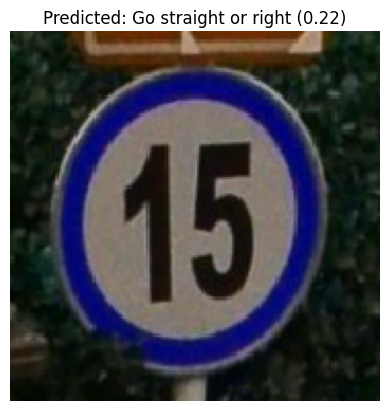

In [30]:
predict_new_image('001_1_0004_1_j.png')

DATA AUGMENTATION

In [42]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1)])

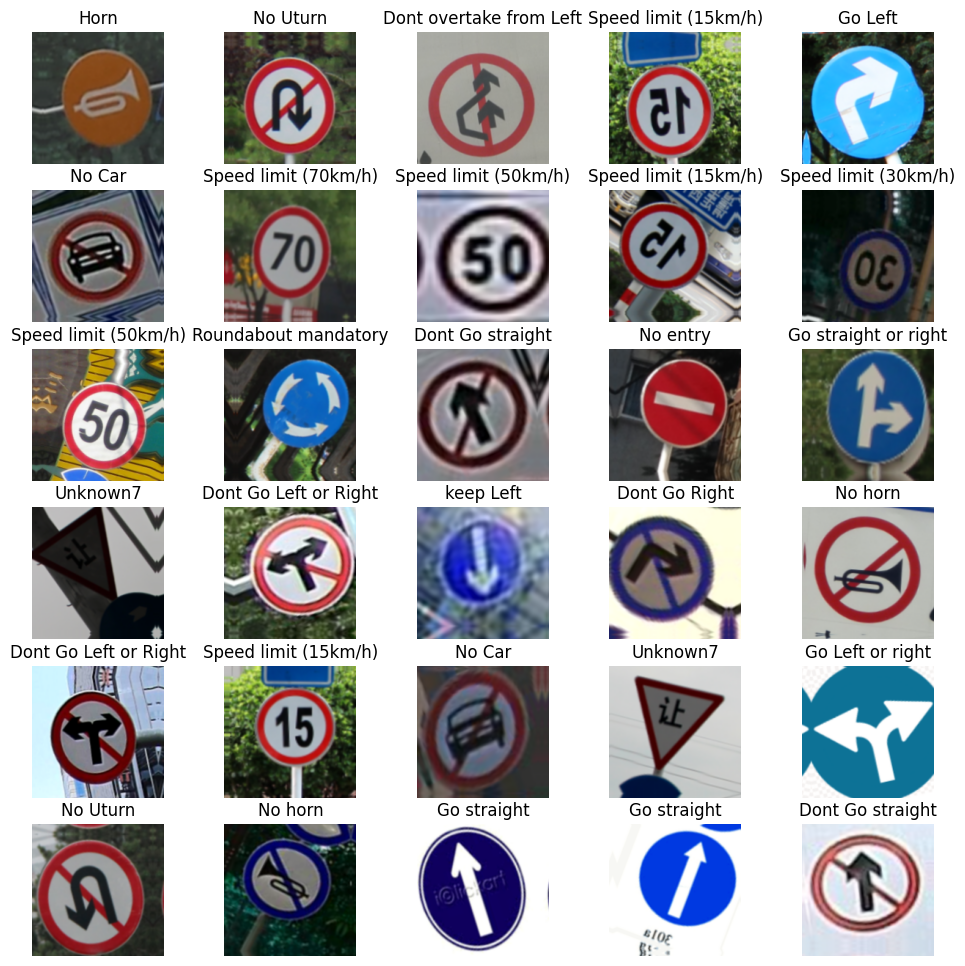

In [43]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(30):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_labels[labels[i]])
        plt.axis("off")
plt.show()

MODEL-2

In [45]:
model = Sequential([ data_aug,layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])
# 1st convolution layer with Dropout layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))
# 2nd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))
# 3rd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))
# 4th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))
# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))
model.add(Flatten())
# Fully connected layer 1 with l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.02)))
# Fully connected layer 2 with Dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))
# Output layer
model.add(Dense(num_classes, activation = "softmax"))
# Compile the model (correct loss function used)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 45, 45, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 22, 22, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 22, 22, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 22, 22, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 11, 11, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (32, 11, 11, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 11, 11, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 1600)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 128)                   │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 128)                   │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 295,070 (1.13 MB)

 Trainable params: 295,070 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
epochs = 40
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.0337 - loss: 7.4588 - val_accuracy: 0.0180 - val_loss: 5.7672
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.0885 - loss: 5.3221 - val_accuracy: 0.0225 - val_loss: 4.3954
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.0345 - loss: 4.2000 - val_accuracy: 0.0541 - val_loss: 3.7775
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.0702 - loss: 3.6659 - val_accuracy: 0.0991 - val_loss: 3.5101
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.0868 - loss: 3.4216 - val_accuracy: 0.0856 - val_loss: 3.4029
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.0997 - loss: 3.3257 - val_accuracy: 0.0856 - val_loss: 3.3137
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.0723 - loss: 3.2518 - val_accuracy: 0.1261 - val_loss: 3.2236
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 0.1399 - loss: 3.0358 - val_accuracy: 0

VISUALIZE RESULTS

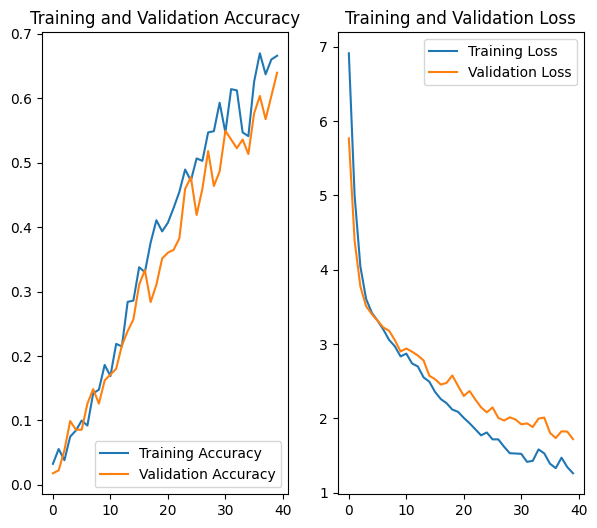

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
VALUATION METRICS

In [20]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.2883 - loss: 4.3216
Test Accuracy: 0.28
Test Loss: 4.37


In [21]:
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=class_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
                          precision    recall  f1-score   support

     Speed limit (5km/h)       1.00      0.25      0.40         4
    Speed limit (15km/h)       0.25      0.33      0.29         6
        Dont Go straight       0.24      1.00      0.39        12
            Dont Go Left       0.71      0.23      0.34        22
   Dont Go Left or Right       1.00      0.22      0.36         9
           Dont Go Right       0.33      0.82      0.47        11
 Dont overtake from Left       1.00      0.50      0.67         2
                No Uturn       0.33      0.27      0.30        15
                  No Car       0.80      0.36      0.5

In [22]:
from tensorflow.keras.preprocessing import image

def predict_new_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    print('Predicted Class:', class_labels[predicted_class])
    print('Confidence:', confidence)

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Class: Dont Go Right
Confidence: 0.5321804


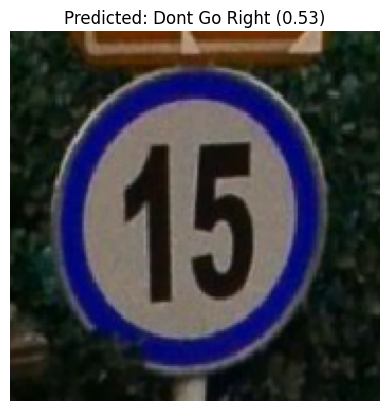

In [23]:
predict_new_image('001_1_0004_1_j.png')

HYPERPARAMETER TUNNING

In [35]:
pip install keras-tuner


   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------ --------------------------------- 20.5/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 435.7 kB/s eta 0:00:01
   --------------------- ----------------- 71.7/129.1 kB 787.7 kB/s eta 0:00:01
   ------------------------------------ - 122.9/129.1 kB 798.9 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 762.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\vidhu\myenv\Scripts\python.exe -m pip install --upgrade pip


In [82]:
def build_model(hp):
    model = Sequential()
    model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))
    model.add(Conv2D(filters=hp.Choice('filters1', [16, 32]), kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1)))

    # Conv Layer 2
    model.add(Conv2D(filters=hp.Choice('filters2', [32, 64]), kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(hp.Float('dropout2', 0.2, 0.4, step=0.1)))

    # Conv Layer 3
    model.add(Conv2D(filters=hp.Choice('filters3', [32, 64]), kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(hp.Float('dropout3', 0.2, 0.4, step=0.1)))

    # Conv Layer 4
    model.add(Conv2D(filters=hp.Choice('filters4', [64, 128]), kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(hp.Float('dropout4', 0.2, 0.4, step=0.1)))

    # Conv Layer 5
    model.add(Conv2D(filters=hp.Choice('filters5', [64, 128]), kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(hp.Float('dropout5', 0.2, 0.4, step=0.1)))

    model.add(Flatten())

    model.add(Dense(units=hp.Choice('dense_units1', [128, 256]), activation='relu',
                    kernel_regularizer=l2(0.02)))
    model.add(Dense(units=hp.Choice('dense_units2', [128, 256]), activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout', 0.2, 0.4, step=0.1)))

    model.add(Dense(30, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', [1e-4, 1e-3])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


TUNER

In [83]:
import keras_tuner as kt
tuner = kt.RandomSearch(
    model,
    objective='val_accuracy',
    max_trials=5,  # Try 10 different models
    executions_per_trial=1,
    directory='road_signs_tuning',
    project_name='tuning'
)

tuner.search_space_summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# Start the search
tuner.search(train_ds, validation_data=val_ds, epochs=5)


Reloading Tuner from road_signs_tuning\tuning\tuner0.json
Search space summary
Default search space size: 11
conv_1_filters (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filters (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128], 'ordered': True}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_3_filters (Choice)
{'default': 128, 'conditions': [], 'values': [128, 256], 'ordered': True}
conv_3_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1_units (Choice)
{'default': 128, 'conditions': [], 'values': [128, 256], 'ordered': True}
dropout_1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_2_units (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128], 'ordered': True}
dropout_2 (Fl

BEST MODEL

In [88]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model=build_model(best_hp)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


history =best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.0463 - loss: 8.0756 - val_accuracy: 0.0270 - val_loss: 7.8215
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.0396 - loss: 7.7371 - val_accuracy: 0.0225 - val_loss: 7.5077
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.0607 - loss: 7.4215 - val_accuracy: 0.0090 - val_loss: 7.2139
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.0661 - loss: 7.1171 - val_accuracy: 0.0315 - val_loss: 6.9392
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.0487 - loss: 6.8584 - val_accuracy: 0.0270 - val_loss: 6.6833
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.0486 - loss: 6.6015 - val_accuracy: 0.0360 - val_loss: 6.4485
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.0501 - loss: 6.3596 - val_accuracy: 0.0360 - val_loss: 6.2317
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.0359 - loss: 6.1518 - val_accu

RESULTS

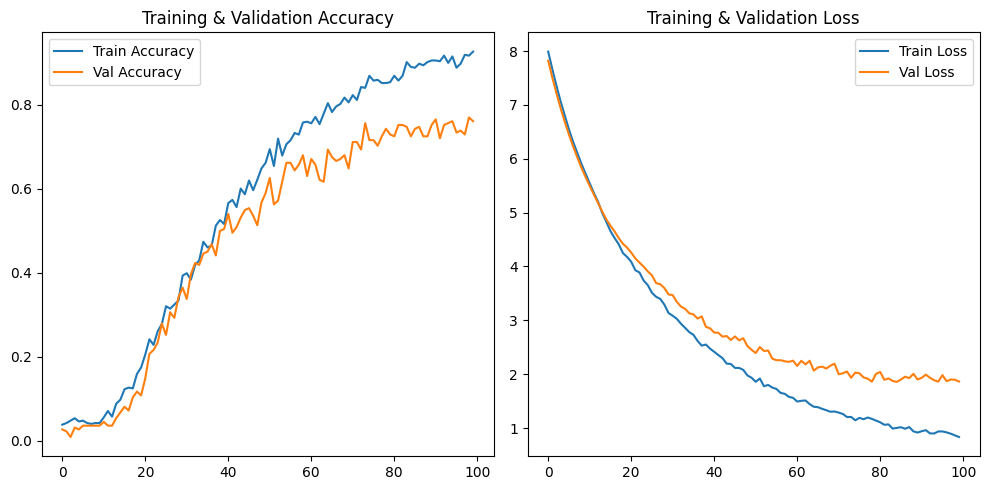

In [90]:
# Plot accuracy and loss
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")

plt.tight_layout()
plt.show()


In [91]:
test_loss, test_acc = best_model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2%}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.3008 - loss: 5.5395
Test Accuracy: 28.21%


In [92]:
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    preds = best_model.predict(tf.expand_dims(images, axis=0))
    y_true.append(labels.numpy())
    y_pred.append(np.argmax(preds))
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━

PREDICTION

In [93]:
from tensorflow.keras.preprocessing import image

def predict_new_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  

    predictions = best_model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    print('Predicted Class:', class_labels[predicted_class])
    print('Confidence:', confidence)

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Class: Dont Go Left or Right
Confidence: 0.06540617


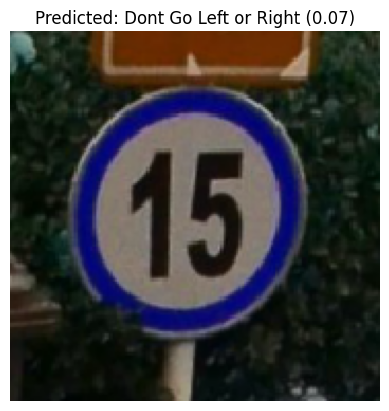

In [94]:
predict_new_image('C:/Users/vidhu/001_1_0003_1_j.png')


USING AUGMENTATOR FOR DATA MODEL

In [24]:
import Augmentor
import os
folder_names = [str(i) for i in range(30)]
# Path to the training dataset root directory
path_to_training_dataset = 'C:/Users/vidhu/Road Signs classification dataset/DATA/'

# Augment images in each class folder
for folder in folder_names:
    class_path = os.path.join(path_to_training_dataset, folder)
    if os.path.exists(class_path):
        p = Augmentor.Pipeline(class_path)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)  # Add 500 augmented images
    else:
        print('Folder not found: ',class_path)


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/0\output.

Processing <PIL.Image.Image image mode=RGB size=175x150 at 0x196BD2D8510>: 100%|█| 500/500 [00:01<00:00, 263.24 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/1\output.

Processing <PIL.Image.Image image mode=RGB size=84x73 at 0x196BD5F6D50>: 100%|█| 500/500 [00:01<00:00, 275.88 Samples/s


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/2\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=143x141 at 0x196BD2FF410>: 100%|█| 500/500 [00:01<00:00


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/3\output.

Processing <PIL.Image.Image image mode=RGB size=257x237 at 0x196BD5EA050>: 100%|█| 500/500 [00:01<00:00, 270.89 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/4\output.

Processing <PIL.Image.Image image mode=RGB size=234x217 at 0x196BD5E9810>: 100%|█| 500/500 [00:01<00:00, 281.01 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/5\output.

Processing <PIL.Image.Image image mode=RGB size=87x83 at 0x196BD2B6110>: 100%|█| 500/500 [00:01<00:00, 280.05 Samples/s


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/6\output.

Processing <PIL.Image.Image image mode=RGB size=121x116 at 0x196BD5AFB10>: 100%|█| 500/500 [00:01<00:00, 283.37 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/7\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=114x102 at 0x19697235010>: 100%|█| 500/500 [00:01<00:00


Initialised with 20 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/8\output.

Processing <PIL.Image.Image image mode=RGBA size=199x178 at 0x196BD2BB0D0>: 100%|█| 500/500 [00:01<00:00, 276.08 Sample


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/9\output.

Processing <PIL.Image.Image image mode=RGB size=218x182 at 0x19692E93090>: 100%|█| 500/500 [00:02<00:00, 208.68 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/10\output.

Processing <PIL.Image.Image image mode=RGB size=77x79 at 0x19697290290>: 100%|█| 500/500 [00:01<00:00, 294.65 Samples/s


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/11\output.

Processing <PIL.Image.Image image mode=RGB size=154x151 at 0x19692A11E50>: 100%|█| 500/500 [00:01<00:00, 260.44 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/12\output.

Processing <PIL.Image.Image image mode=RGB size=94x100 at 0x1969727D010>: 100%|█| 500/500 [00:02<00:00, 246.53 Samples/


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/13\output.

Processing <PIL.Image.Image image mode=RGB size=160x160 at 0x196929B4790>: 100%|█| 500/500 [00:01<00:00, 270.96 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/14\output.

Processing <PIL.Image.Image image mode=RGB size=158x139 at 0x19696CCAF50>: 100%|█| 500/500 [00:01<00:00, 281.11 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/15\output.

Processing <PIL.Image.Image image mode=RGB size=160x160 at 0x196929EC110>: 100%|█| 500/500 [00:01<00:00, 265.45 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/16\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=56x56 at 0x19697452A10>: 100%|█| 500/500 [00:01<00:00, 


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/17\output.

Processing <PIL.Image.Image image mode=RGB size=150x154 at 0x19692E63690>: 100%|█| 500/500 [00:01<00:00, 277.60 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/18\output.

Processing <PIL.Image.Image image mode=RGB size=155x151 at 0x19692B6E450>: 100%|█| 500/500 [00:02<00:00, 234.99 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/19\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=144x141 at 0x19692E6AF10>: 100%|█| 500/500 [00:01<00:00


Initialised with 24 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/20\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=126x110 at 0x19692DD37D0>: 100%|█| 500/500 [00:03<00:00


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/21\output.

Processing <PIL.Image.Image image mode=RGBA size=292x232 at 0x19692F14F10>: 100%|█| 500/500 [00:01<00:00, 253.17 Sample


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/22\output.

Processing <PIL.Image.Image image mode=RGB size=166x159 at 0x19692E53D10>: 100%|█| 500/500 [00:01<00:00, 272.54 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/23\output.

Processing <PIL.Image.Image image mode=P size=225x225 at 0x19692C0CE50>: 100%|█| 500/500 [00:02<00:00, 192.74 Samples/s


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/24\output.

Processing <PIL.Image.Image image mode=RGB size=201x173 at 0x19692B81F50>: 100%|█| 500/500 [00:01<00:00, 281.50 Samples


Initialised with 24 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/25\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=192x301 at 0x19692F8D1D0>: 100%|█| 500/500 [00:02<00:0


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/26\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x160 at 0x1969728C150>: 100%|█| 500/500 [00:01<00:00


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/27\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=134x125 at 0x19693064610>: 100%|█| 500/500 [00:01<00:00


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/28\output.

Processing <PIL.Image.Image image mode=RGB size=262x242 at 0x19692EAC550>: 100%|█| 500/500 [00:01<00:00, 261.91 Samples


Initialised with 25 image(s) found.
Output directory set to C:/Users/vidhu/Road Signs classification dataset/DATA/29\output.

Processing <PIL.Image.Image image mode=RGB size=91x91 at 0x196930D18D0>: 100%|█| 500/500 [00:01<00:00, 293.39 Samples/s


In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.png')))
print(image_count_train)

14910


In [26]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.png'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.png'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df['Label'].value_counts()

Label
0     500
1     500
10    500
11    500
12    500
13    500
14    500
15    500
16    500
17    500
18    500
19    500
2     500
22    500
6     500
24    500
26    500
25    500
27    500
28    500
3     500
29    500
9     500
7     500
4     500
5     500
20    484
21    481
23    473
8     472
Name: count, dtype: int64

In [27]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 30

In [28]:
data_dir_train = root_path+'DATA/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15743 files belonging to 30 classes.
Using 12595 files for training.


In [29]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15743 files belonging to 30 classes.
Using 3148 files for validation.


In [30]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 280 files belonging to 30 classes.


In [31]:
model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer 
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 4th convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layer 1 with Dropout layer and l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0105)))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 45, 45, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,558 (1.06 MB)

 Trainable params: 278,558 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.0560 - loss: 4.4528 - val_accuracy: 0.2658 - val_loss: 2.9074
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.4001 - loss: 2.3696 - val_accuracy: 0.7793 - val_loss: 1.2640
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.7775 - loss: 1.1684 - val_accuracy: 0.9234 - val_loss: 0.8216
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.8741 - loss: 0.8090 - val_accuracy: 0.9640 - val_loss: 0.7079
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.9264 - loss: 0.6397 - val_accuracy: 0.9595 - val_loss: 0.6814
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.9457 - loss: 0.5589 - val_accuracy: 0.9685 - val_loss: 0.5756
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.9588 - loss: 0.4946 - val_accuracy: 0.9820 - val_loss: 0.4723
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9569 - loss: 0.4839 - val_accu

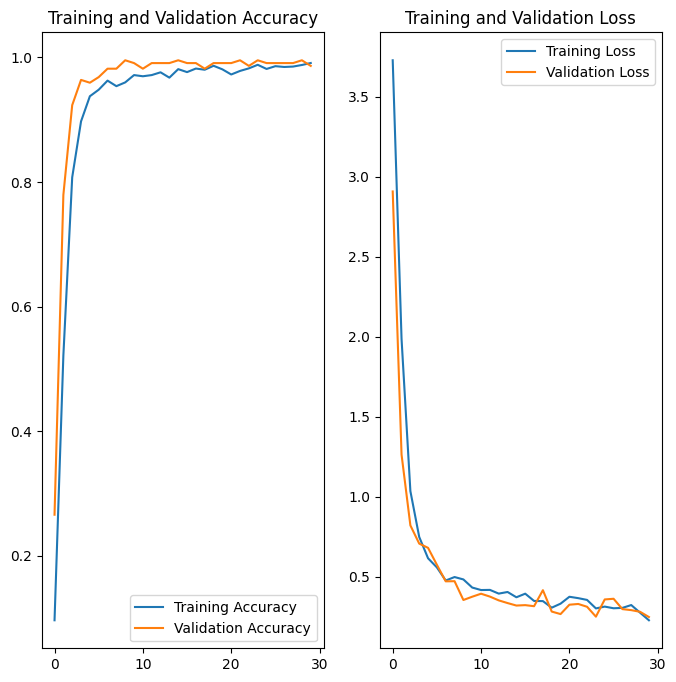

In [35]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
val_loss, val_acc = model.evaluate(val_ds)
print('Validation Accuracy after tuning: ',val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9853 - loss: 0.2668
Validation Accuracy after tuning:  0.9864864945411682


In [38]:
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    preds = model.predict(tf.expand_dims(images, axis=0))
    y_true.append(labels.numpy())
    y_pred.append(np.argmax(preds))
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [39]:
from tensorflow.keras.preprocessing import image

def predict_new_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    print('Predicted Class:', class_labels[predicted_class])
    print('Confidence:', confidence)

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Class: Roundabout mandatory
Confidence: 0.16181816


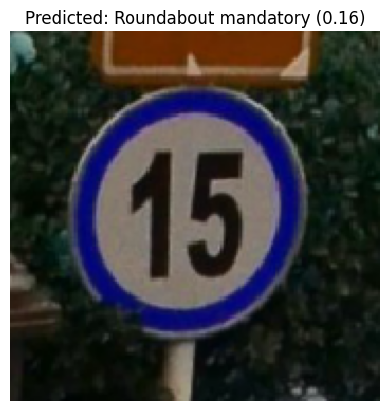

In [40]:
predict_new_image('C:/Users/vidhu/001_1_0003_1_j.png')